In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
win = 30

In [3]:
goog = pd.read_csv('GOOG_Price_Stats_0313.csv')
goog

,date,adj_close,volume,DE Ratio,Return on Equity,Price/Book,Profit Margin,Diluted EPS,Beta
0,2004-08-19,49.845802,44994500,0.004,26.43,19.61,9.95,0.723,1.04
1,2004-08-20,53.805050,23005800,0.004,26.43,19.61,9.95,0.723,1.04
2,2004-08-23,54.346527,18393200,0.004,26.43,19.61,9.95,0.723,1.04
3,2004-08-24,52.096165,15361800,0.004,26.43,19.61,9.95,0.723,1.04
4,2004-08-25,52.657513,9257400,0.004,26.43,19.61,9.95,0.723,1.04
...,...,...,...,...,...,...,...,...,...
2356,2013-12-24,552.327637,1477800,9.770,16.36,4.02,20.92,33.420,1.16
2357,2013-12-26,555.119507,2692900,9.770,16.36,4.02,20.92,33.420,1.16
2358,2013-12-27,555.586426,3159800,9.770,16.36,4.02,20.92,33.420,1.16
2359,2013-12-30,551.145325,2488100,9.770,16.36,4.02,20.92,33.420,1.16


In [78]:
goog = goog.loc[:,['date','adj_close']]
goog.date=pd.to_datetime(goog.date,infer_datetime_format=True)
goog = goog.set_index('date')

In [79]:
goog

,adj_close
date,
2004-08-19,49.845802
2004-08-20,53.805050
2004-08-23,54.346527
2004-08-24,52.096165
2004-08-25,52.657513
...,...
2013-12-24,552.327637
2013-12-26,555.119507
2013-12-27,555.586426


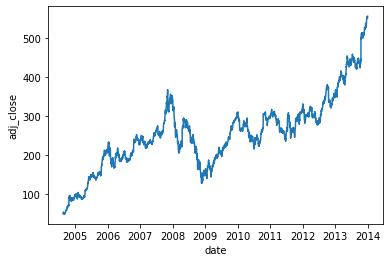

In [80]:
##plot graph
plt.xlabel('date')
plt.ylabel('adj_close')
plt.plot(goog)

In [81]:
##Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(goog['adj_close'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Vlues (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistics                  -0.160366
p-value                           0.943084
#Lags Used                        0.000000
Number of Observations Used    2360.000000
Critical Vlues (1%)              -3.433124
Critical Vlues (5%)              -2.862765
Critical Vlues (10%)             -2.567422
dtype: float64


## Stationary Test

In [84]:
##Stationary Test
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries,win):
    #Determine rolling statistics
    movingAvg = timeseries.rolling(window=win).mean()
    movingStd = timeseries.rolling(window=win).std()
    
    #plot rolling statistics
    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(movingAvg,color='red',label='Rolling Mean')
    std = plt.plot(movingStd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['adj_close'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Vlues (%s)'%key] = value
    print(dfoutput)

In [90]:
goog_log_train = goog_logscale_shift[:'2012-12-31']
goog_log_test = goog_logscale_shift['2013-01-01':]

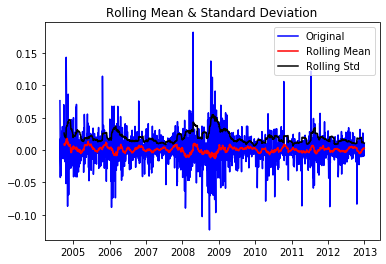

Results of Dickey-Fuller Test:
Test Statistics               -1.218261e+01
p-value                        1.340817e-22
#Lags Used                     1.100000e+01
Number of Observations Used    2.096000e+03
Critical Vlues (1%)           -3.433474e+00
Critical Vlues (5%)           -2.862920e+00
Critical Vlues (10%)          -2.567505e+00
dtype: float64


In [125]:
test_stationary(goog_log_train,30)

In [126]:
from sklearn.preprocessing import minmax_scale
goog_scaled = goog.apply(minmax_scale)

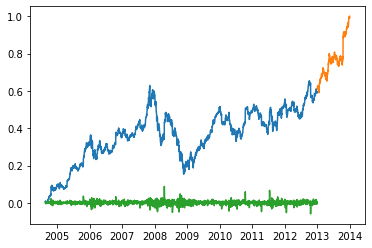

In [137]:
goog_scaled_train = goog_scaled[:'2012-12-31']
goog_scaled_test = goog_scaled['2013-01-01':]
goog_scaled_train_shift = goog_scaled_train - goog_scaled_train.shift()
plt.plot(goog_scaled_train)
plt.plot(goog_scaled_test)
goog_scaled_train_shift.dropna(inplace=True)
plt.plot(goog_scaled_train_shift)

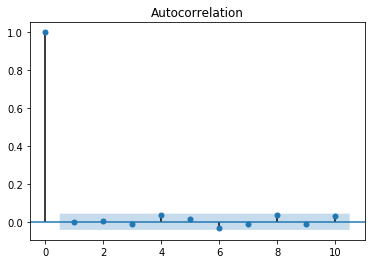

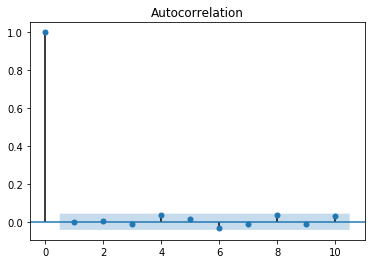

In [151]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(goog_scaled_train_shift,lags=10)
#plt.subplot(122)
#plot_pacf(goog_scaled_train_shift,lags=10)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3315      0.143      2.319      0.020       0.051       0.612
ar.L1.adj_close     0.9990      0.001    971.413      0.000       0.997       1.001
ma.L1.adj_close     0.0030      0.022      0.137      0.891      -0.039       0.045


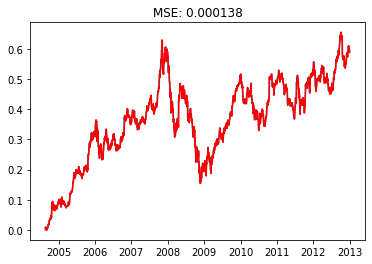

In [160]:
#ARIMA Model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(goog_scaled_train, order=(1,0,1))
results_ARIMA = model.fit()
plt.plot(goog_scaled_train[1:])
plt.plot(results_ARIMA.fittedvalues[1:], color = 'red')
plt.title('MSE: %f'%((results_ARIMA.fittedvalues - goog_scaled_train['adj_close'])**2).mean())
print(results_ARIMA.summary().tables[1])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


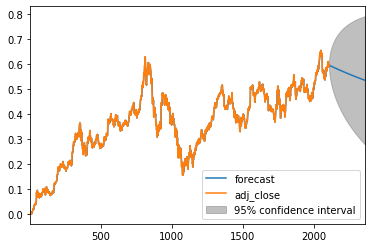

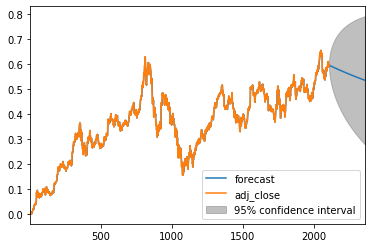

In [161]:
results_ARIMA.plot_predict(1,2361)
#plt.plot(goog_log_test)
#plt.plot(goog_log_test_fc)


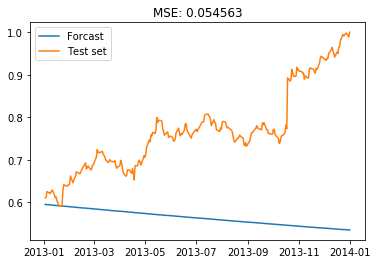

In [167]:
pred = pd.DataFrame(results_ARIMA.forecast(steps=252)[0],index=goog_scaled_test.index)
pred.columns = ['adj_close']
plt.plot(pred,label = 'Forcast')
plt.plot(goog_scaled_test,label = 'Test set')
plt.title('MSE: %f'%((pred['adj_close'] - goog_scaled_test['adj_close'])**2).mean())
plt.legend()